In [1]:
# !pip install -U pip setuptools wheel
!pip install -U scikit-learn
#!pip install sklearn
!pip install gensim
!pip install numpy
!pip install tqdm
!pip install matplotlib

!pip install keras
!pip install wordcloud
!pip install pydot
!pip install graphviz
!pip install transformers
!pip install bltk
!pip install ipython-autotime
%load_ext autotime
! pip install -U imbalanced-learn
!pip install visualkeras
!pip install pydot graphviz
!pip install keras-utils
! pip install bnlp_toolkit
! pip install banglanltk
# ! pip install inltk
! pip install bnltk
!pip install git+https://github.com/csebuetnlp/normalizer

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - error
  error: subprocess-exited-with-error
  
  × pytho

In [2]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler
from keras.utils import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.models import Model
import tensorflow as tf

from warnings import filterwarnings
filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


time: 19.6 s (started: 2024-01-09 00:53:01 +00:00)


In [3]:
#Setup Gdrive file download extention 
#!conda install -y gdown
!pip install gdown


time: 11.9 s (started: 2024-01-09 00:53:21 +00:00)


In [4]:
import gdown 
url = 'https://drive.google.com/uc?id=1QtknSmc9xkLscFCLo0g2grXtvphkBQu5' 
output = 'newfinal_data.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1QtknSmc9xkLscFCLo0g2grXtvphkBQu5
To: /kaggle/working/newfinal_data.csv
100%|██████████| 84.9M/84.9M [00:00<00:00, 214MB/s]


'newfinal_data.csv'

time: 3.63 s (started: 2024-01-09 00:53:33 +00:00)


In [5]:
import pandas as pd
data = pd.read_csv('/kaggle/working/newfinal_data.csv')
data.head()

,Author,tokenized_sentence
0,Ahmad Sofa,আমি পাঠকদের সুবিবেচনার জন্য এমন একটি মত উপস্থি...
1,Ahmad Sofa,কোন বক্তব্য অথবা যুক্তিকে সত্য বলে স্বীকার করা...
2,Ahmad Sofa,আমি নিশ্চিতভাবে বিশ্বাস করি যে এ রকম মতবাদ সাধ...
3,Ahmad Sofa,"তা সম্ভব হলে ঝাঁঝালো বক্তা, বই ব্যবসায়ী, ধর্ম..."
4,Ahmad Sofa,অনেক প্রতিকূল মারাত্মক যুক্তি থাকা সত্বেও আমি ...


time: 1.45 s (started: 2024-01-09 00:53:36 +00:00)


In [6]:
import csv
import random

def shuffle_csv_with_headers(filename):

  with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)
    data = list(reader)

  random.shuffle(data)

  with open("shuffled_data.csv", 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    writer.writerows(data)


if __name__ == '__main__':
  filename = '/kaggle/working/newfinal_data.csv'
  shuffle_csv_with_headers(filename)


time: 4.14 s (started: 2024-01-09 00:53:38 +00:00)


In [7]:
df = pd.read_csv('/kaggle/working/shuffled_data.csv')
df.head()

,Author,tokenized_sentence
0,Humayun Ahmed,খুব সাবধানে লিকার বের করব।
1,Rabindranath Tagore,এই-যে বিশ্ববিদ্যালয়ে সংগীতশিক্ষার ব্যবস্থা হচ্...
2,Rabindranath Tagore,“তখন তো ওর এত গুমর ছিল না।”
3,Rabindranath Tagore,মানুষ আবার ফিরল তার প্রথম আরম্ভের অবস্থায়— সেই...
4,Sharat Chandra Chattapaddhay,"বলিল, মাথা খাও সেজদাদামশাই, আর একদিন আনতে যেন ..."


time: 1.53 s (started: 2024-01-09 00:53:42 +00:00)


In [8]:
print("Shape of the dataset => (Rows, Columns) = ",end='')
df.shape

Shape of the dataset => (Rows, Columns) = 

(391539, 2)

time: 2.94 ms (started: 2024-01-09 00:53:44 +00:00)


In [9]:
display(df.describe())

,Author,tokenized_sentence
count,391539,391539
unique,7,340191
top,Rabindranath Tagore,রসিক।
freq,225593,401


time: 419 ms (started: 2024-01-09 00:53:44 +00:00)


In [10]:
df.isnull().sum()

Author                0
tokenized_sentence    0
dtype: int64

time: 82 ms (started: 2024-01-09 00:53:44 +00:00)


In [11]:

print(f'Total number of sentences:',len(df['tokenized_sentence']))
print(f'Unique number of Author:',len(df['Author'].unique()))
print(f"Authors => {', '.join(df['Author'].unique())}")
print(f'Unique number of sentences:',len(df['tokenized_sentence'].unique()))
df["Author"].value_counts()

Total number of sentences: 391539
Unique number of Author: 7
Authors => Humayun Ahmed, Rabindranath Tagore, Sharat Chandra Chattapaddhay, Bankim Chandra, Begum Rokeya, Zafor Iqbal, Ahmad Sofa
Unique number of sentences: 340191


Author
Rabindranath Tagore             225593
Sharat Chandra Chattapaddhay     85491
Bankim Chandra                   45321
Zafor Iqbal                      10686
Humayun Ahmed                     9994
Ahmad Sofa                        7387
Begum Rokeya                      7067
Name: count, dtype: int64

time: 522 ms (started: 2024-01-09 00:53:44 +00:00)


In [12]:
size = len(df['tokenized_sentence'])
size_uniq = len(df['tokenized_sentence'].drop_duplicates())

print("Duplicate sentences =",(size - size_uniq))

Duplicate sentences = 51348
time: 77.7 ms (started: 2024-01-09 00:53:45 +00:00)


In [13]:
df2 = df[df.duplicated()]
df2.head(20)

,Author,tokenized_sentence
292,Bankim Chandra,আমি।
917,Rabindranath Tagore,"অচিরা বললে, “সব বুঝলুম।”"
1299,Rabindranath Tagore,শৈল।
1320,Begum Rokeya,জাফ ।
1397,Bankim Chandra,না।
1509,Rabindranath Tagore,বিনোদিনী।
1813,Sharat Chandra Chattapaddhay,কেন?
1872,Bankim Chandra,রাজা।
1943,Rabindranath Tagore,পুরবালা।
2025,Bankim Chandra,তিনি।


time: 318 ms (started: 2024-01-09 00:53:45 +00:00)


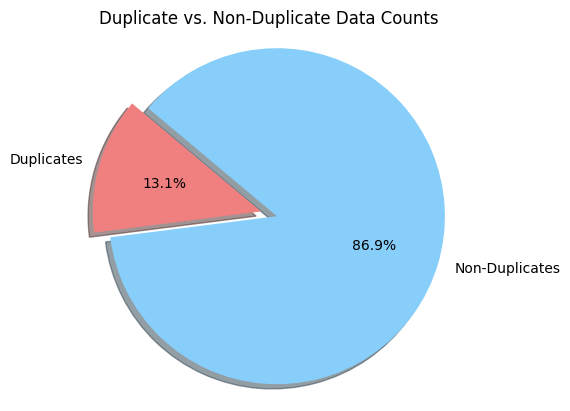

time: 200 ms (started: 2024-01-09 00:53:46 +00:00)


In [14]:
labels = 'Duplicates', 'Non-Duplicates'
sizes = [size - size_uniq, size_uniq]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Duplicates)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Duplicate vs. Non-Duplicate Data Counts')
plt.show()


In [15]:
df = df.drop_duplicates(subset='tokenized_sentence',ignore_index=True)


print(f'Total number of sentences:',len(df['tokenized_sentence']))
print(f'Unique number of Author:',len(df['Author'].unique()))
print(f"Authors => {', '.join(df['Author'].unique())}")
print(f'Unique number of sentences:',len(df['tokenized_sentence'].unique()))
df["Author"].value_counts()

Total number of sentences: 340191
Unique number of Author: 7
Authors => Humayun Ahmed, Rabindranath Tagore, Sharat Chandra Chattapaddhay, Bankim Chandra, Begum Rokeya, Zafor Iqbal, Ahmad Sofa
Unique number of sentences: 340191


Author
Rabindranath Tagore             188140
Sharat Chandra Chattapaddhay     83126
Bankim Chandra                   39926
Zafor Iqbal                       7661
Humayun Ahmed                     7565
Ahmad Sofa                        7227
Begum Rokeya                      6546
Name: count, dtype: int64

time: 404 ms (started: 2024-01-09 00:53:46 +00:00)


In [16]:
length = 0
count = 0
max = 0
min = 99999999999999999999999999999
for i in df['tokenized_sentence']:
  length+=len(str(i).split(" "))
  if len(str(i).split(" "))>max:
    max = len(str(i).split(" "))
  if len(str(i).split(" "))<min:
    min = len(str(i).split(" "))
  count+=1
average = length//count
print('Smallest text length =',min)
print('Largest text length =',max)
print('Average text length =',average)

Smallest text length = 1
Largest text length = 800
Average text length = 12
time: 1.36 s (started: 2024-01-09 00:53:46 +00:00)


In [17]:
small = 0
large = 0
avg = 0
for i in df['tokenized_sentence']:
  l = len(str(i).split(" "))
  if 10<=l<=15:
    avg+=1
  elif l>average:
    large+=1
  else:
    small+=1

print('Smallest text count =',small)
print('Largest text count =',large)
print('Average text count =',avg)

Smallest text count = 152384
Largest text count = 90966
Average text count = 96841
time: 639 ms (started: 2024-01-09 00:53:48 +00:00)


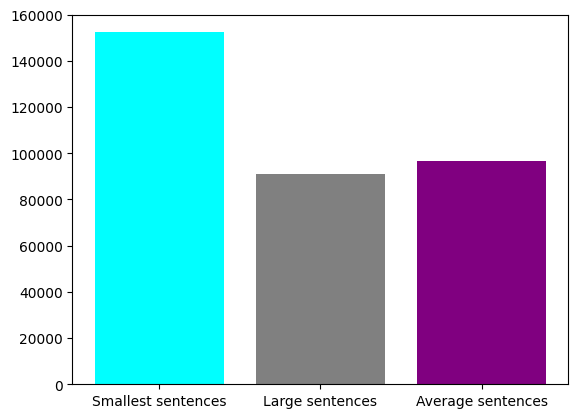

time: 150 ms (started: 2024-01-09 00:53:48 +00:00)


In [18]:
data1 = {'Smallest sentences':small,'Large sentences':large,'Average sentences':avg}
names = list(data1.keys())
values = list(data1.values())
colors = ['cyan','grey','purple']
plt.bar(range(len(data1)), values, tick_label=names,color=colors)
plt.show()


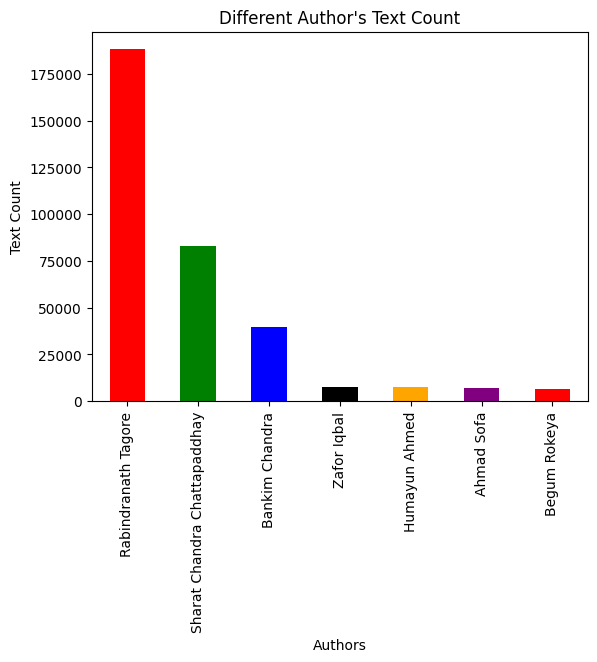

<Axes: ylabel='count'>

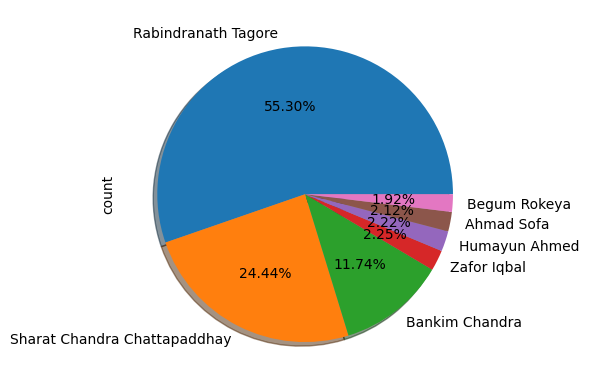

time: 607 ms (started: 2024-01-09 00:53:49 +00:00)


In [19]:

dataplot_a = df['Author'].value_counts()

import matplotlib.font_manager as fm
colors = ['red', 'green', 'blue','black','orange','purple']
dataplot_a.plot(kind='bar',color = colors)
plt.xlabel('Authors')
plt.ylabel('Text Count')
plt.title('Different Author\'s Text Count')
plt.show()


print('=============================================================================================')

df["Author"].value_counts().plot(kind="pie",autopct='%.2f%%',
    shadow=True)





# ***Labeling***

In [20]:
df['Author_label'] = df['Author'].map({'Rabindranath Tagore':1,'Bankim Chandra':0,'Sharat Chandra Chattapaddhay':0,'Humayun Ahmed':0,'Zafor Iqbal':0,'Begum Rokeya':0,'Ahmad Sofa':0})

time: 33.2 ms (started: 2024-01-09 00:53:49 +00:00)


In [21]:
df.head()

,Author,tokenized_sentence,Author_label
0,Humayun Ahmed,খুব সাবধানে লিকার বের করব।,0
1,Rabindranath Tagore,এই-যে বিশ্ববিদ্যালয়ে সংগীতশিক্ষার ব্যবস্থা হচ্...,1
2,Rabindranath Tagore,“তখন তো ওর এত গুমর ছিল না।”,1
3,Rabindranath Tagore,মানুষ আবার ফিরল তার প্রথম আরম্ভের অবস্থায়— সেই...,1
4,Sharat Chandra Chattapaddhay,"বলিল, মাথা খাও সেজদাদামশাই, আর একদিন আনতে যেন ...",0


time: 6.01 ms (started: 2024-01-09 00:53:50 +00:00)


# ***Undersampling***

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

time: 465 ms (started: 2024-01-09 00:53:50 +00:00)


In [23]:
df1 = df.loc[df['Author']=='Rabindranath Tagore']
df2 = df.loc[df['Author']=='Sharat Chandra Chattapaddhay']
df3 = df.loc[df['Author']=='Bankim Chandra']
df4 = df.loc[df['Author']=='Zafor Iqbal']
df5 = df.loc[df['Author']=='Humayun Ahmed']
df6 = df.loc[df['Author']=='Ahmad Sofa']
df7 = df.loc[df['Author']=='Begum Rokeya']


time: 362 ms (started: 2024-01-09 00:53:50 +00:00)


In [24]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(188140, 3)
(83126, 3)
(39926, 3)
(7661, 3)
(7565, 3)
(7227, 3)
(6546, 3)
time: 693 µs (started: 2024-01-09 00:53:51 +00:00)


In [25]:
df11 = df1.sample(152035,replace=True)
df12 = df2.sample(83108,replace=True)
df13 = df3.sample(39928,replace=True)
df14 = df4.sample(7656,replace=True)
df15 = df5.sample(7564,replace=True)
df16 = df6.sample(7226,replace=True)
df17 = df7.sample(6553,replace=True)

time: 40.9 ms (started: 2024-01-09 00:53:51 +00:00)


In [26]:
#train+eval data
df21 = df11[:136831]
df22 = df12[:76486]
df23 = df13[:35142]
df24 = df14[:6824]
df25 = df15[:6651]
df26 = df16[:6180]
df27 = df17[:5548]

#test data
df31 = df11[136831:]
df32 = df12[76486:]
df33 = df13[35142:]
df34 = df14[6824:]
df35 = df15[6651:]
df36 = df16[6180:]
df37 = df17[5548:]

time: 2.46 ms (started: 2024-01-09 00:53:51 +00:00)


In [27]:
frames = [df21,df22,df23,df24,df25,df26,df27]
result = pd.concat(frames)

train_data= result.sample(frac=1).reset_index(drop=True)
train_data['Author'].value_counts()


Author
Rabindranath Tagore             136831
Sharat Chandra Chattapaddhay     76486
Bankim Chandra                   35142
Zafor Iqbal                       6824
Humayun Ahmed                     6651
Ahmad Sofa                        6180
Begum Rokeya                      5548
Name: count, dtype: int64

time: 102 ms (started: 2024-01-09 00:53:51 +00:00)


In [28]:
train_data.head()

,Author,tokenized_sentence,Author_label
0,Sharat Chandra Chattapaddhay,কুসুমের গৌরবর্ণ মুখ একেবারে পান্ডুর হইয়া গিয়াছিল।,0
1,Sharat Chandra Chattapaddhay,"মাসি কহিলেন, সে ত জানা কথা বেণী।",0
2,Rabindranath Tagore,মানুষ সমাজের মধ্য দিয়া সমাজকে ছাড়াইয়া যাইবে বল...,1
3,Rabindranath Tagore,সে হলে তো কোনো গোলই ছিল না!,1
4,Rabindranath Tagore,আমি নেপালে গেলাম।,1


time: 5.82 ms (started: 2024-01-09 00:53:51 +00:00)


In [29]:
train_data.shape

(273662, 3)

time: 1.96 ms (started: 2024-01-09 00:53:51 +00:00)


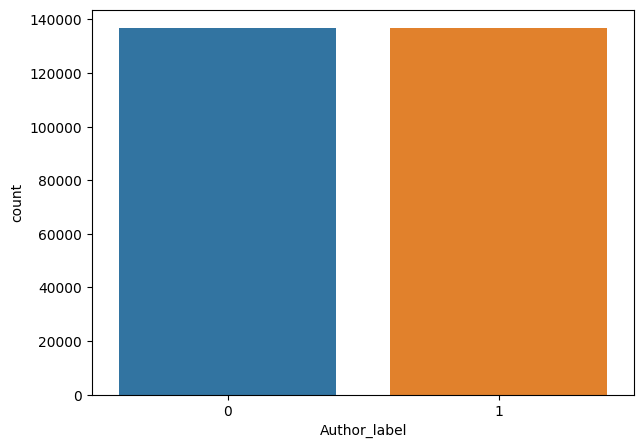

time: 154 ms (started: 2024-01-09 00:53:51 +00:00)


In [30]:
plt.figure(figsize=(7,5))
sns.countplot(data=train_data,x="Author_label")
plt.show()

In [31]:
frames = [df31,df32,df33,df34,df35,df36,df37]
result = pd.concat(frames)

test_data= result.sample(frac=1).reset_index(drop=True)
test_data['Author'].value_counts()

Author
Rabindranath Tagore             15204
Sharat Chandra Chattapaddhay     6622
Bankim Chandra                   4786
Ahmad Sofa                       1046
Begum Rokeya                     1005
Humayun Ahmed                     913
Zafor Iqbal                       832
Name: count, dtype: int64

time: 19.3 ms (started: 2024-01-09 00:53:51 +00:00)


In [32]:
test_data.shape

(30408, 3)

time: 2.36 ms (started: 2024-01-09 00:53:52 +00:00)


In [33]:
test_data.head()

,Author,tokenized_sentence,Author_label
0,Rabindranath Tagore,যে লোক দেশের প্রত্যেক লোকের মধ্যে সমগ্র দেশকে ...,1
1,Sharat Chandra Chattapaddhay,আমার বিরুদ্ধে হলো কি তাঁর?,0
2,Sharat Chandra Chattapaddhay,"বলিলাম, বিদেশে যাবার পূর্বে একবার দেখা দিয়ে আস...",0
3,Sharat Chandra Chattapaddhay,"আমরা প্রভু, তোমরা দাসী, এই সংস্কারটাই এ দেশের ...",0
4,Sharat Chandra Chattapaddhay,"তারক মুখে হাসি আনিয়া বিদ্রূপের স্বরে বলিল, না ...",0


time: 6.05 ms (started: 2024-01-09 00:53:52 +00:00)


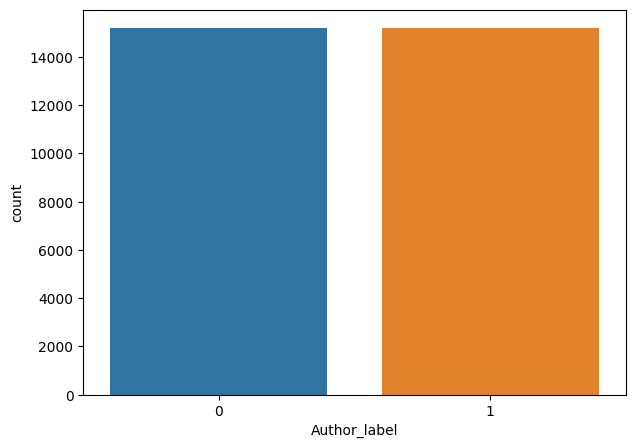

time: 202 ms (started: 2024-01-09 00:53:52 +00:00)


In [34]:
plt.figure(figsize=(7,5))
sns.countplot(data=test_data,x="Author_label")
plt.show()

In [35]:
test_data.shape

(30408, 3)

time: 2.59 ms (started: 2024-01-09 00:53:52 +00:00)


# ***Loading BanglaBERT***

In [36]:
from transformers import AutoModelForPreTraining, AutoTokenizer, TFAutoModel
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer
import torch

bmodel = TFAutoModel.from_pretrained("csebuetnlp/banglabert", from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['electra.embeddings.position_ids', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further train

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

time: 12.7 s (started: 2024-01-09 00:53:52 +00:00)


# ***Train-Eval split***

In [37]:
max_len=40
sentences=train_data["tokenized_sentence"]
labels=train_data["Author_label"]


test_sentences=test_data["tokenized_sentence"]
test_labels=test_data["Author_label"]

time: 851 µs (started: 2024-01-09 00:54:05 +00:00)


In [38]:


input_ids=[]
attention_masks=[]

for sent in sentences:
    bangla_bert_input_shape= tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids.append(bangla_bert_input_shape['input_ids'])
    attention_masks.append(bangla_bert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

test_ids=[]
test_attention_masks=[]

for sent in test_sentences:
    bangla_bert_input_shape= tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    test_ids.append(bangla_bert_input_shape['input_ids'])
    test_attention_masks.append(bangla_bert_input_shape['attention_mask'])

test_ids=np.asarray(test_ids)
test_attention_masks=np.array(test_attention_masks)
test_labels=np.array(test_labels)
print(len(input_ids),len(attention_masks),len(labels))
print('Input shape {} \nAttention mask shape {} \nInput label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.3,random_state=42,shuffle=True)

print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

273662 273662 273662
Input shape (273662, 40) 
Attention mask shape (273662, 40) 
Input label shape (273662,)
Train input shape (191563, 40)
Test input shape (82099, 40)
Train label shape (191563,)
Test label shape (82099,)
Train attention mask shape (191563, 40)
Test attention mask shape (82099, 40)
time: 47.6 s (started: 2024-01-09 00:54:05 +00:00)


In [39]:
from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import Bidirectional
def create_model():
    input_shape = Input(shape = (max_len,), dtype='int32')
    masks= Input(shape = (max_len,), dtype='int32')
    bangla_bert_layer = bmodel(input_ids=input_shape, attention_mask=masks)[0]
    X = (tf.keras.layers.Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))(bangla_bert_layer)
    #X = (tf.keras.layers.Bidirectional(LSTM(256, dropout=0.2)))(bangla_bert_layer)
   
    X = tf.keras.layers.Dense(2, activation='softmax')(X)
    model = tf.keras.Model(inputs=[input_shape,masks], outputs=X)
    return model


model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 tf_electra_model (TFElectr  TFBaseModelOutputWithPastA   1100267   ['input_1[0][0]',             
 aModel)                     ndCrossAttentions(last_hid   52         'input_2[0][0]']             
                             den_state=(None, 40, 768),                                           
                              past_key_values=None, hid                                       

Model image saved as 'model.png'


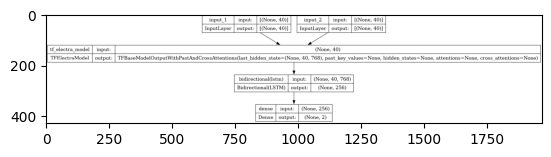

time: 960 ms (started: 2024-01-09 00:55:00 +00:00)


In [40]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

print("Model image saved as 'model.png'")
img = plt.imread('/kaggle/working/model_plot2.png')
plt.imshow(img)


In [41]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the number of epochs
epoch = 500

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, mode='min')

# Define model checkpointing to save the best model weights
model_checkpoint = ModelCheckpoint('best_model_weights.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Compile and train the model with both callbacks
history = model.fit(
    [X_train_input, train_mask],
    Y_train_label,
    batch_size=32,
    epochs=epoch,
    validation_data=([X_test_input, test_mask], Y_test_label),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/500
5987/5987 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.8831
Epoch 1: val_loss improved from inf to 0.20518, saving model to best_model_weights.h5
5987/5987 [==============================] - 3409s 561ms/step - loss: 0.2634 - accuracy: 0.8831 - val_loss: 0.2052 - val_accuracy: 0.9118
Epoch 2/500
5987/5987 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9419
Epoch 2: val_loss improved from 0.20518 to 0.15660, saving model to best_model_weights.h5
5987/5987 [==============================] - 3339s 558ms/step - loss: 0.1426 - accuracy: 0.9419 - val_loss: 0.1566 - val_accuracy: 0.9371
Epoch 3/500
5987/5987 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9673
Epoch 3: val_loss improved from 0.15660 to 0.15109, saving model to best_model_weights.h5
5987/5987 [==============================] - 3338s 558ms/step - loss: 0.0842 - accuracy: 0.9673 - val_loss: 0.1511 - val_accuracy: 0.9464
Epoch 4/500
5987/5987 [

In [42]:
model.save('robVsnonrob.h5')

time: 2.15 s (started: 2024-01-09 06:30:18 +00:00)


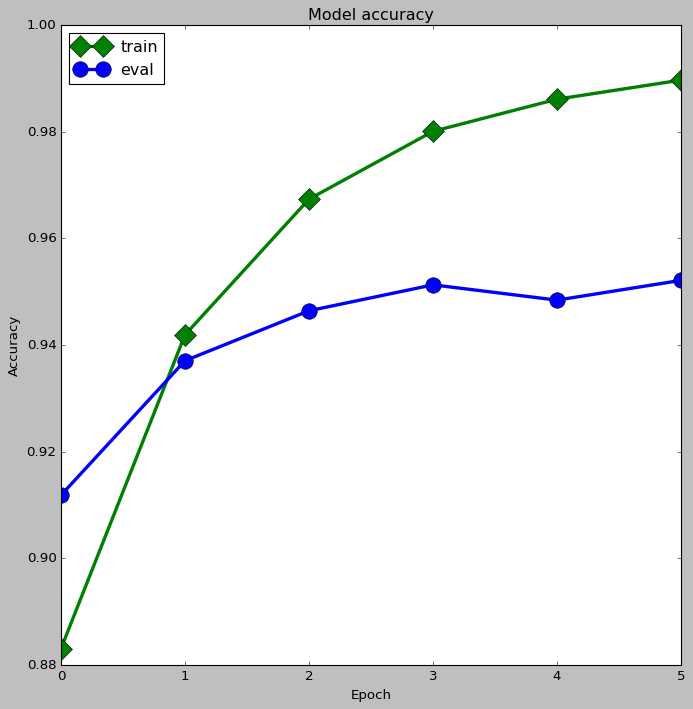

time: 258 ms (started: 2024-01-09 06:30:27 +00:00)


In [43]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],color="green",marker="D",markersize=14,lw=3)
plt.plot(history.
history['val_accuracy'],color="blue",marker="o",markersize=14,lw=3)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

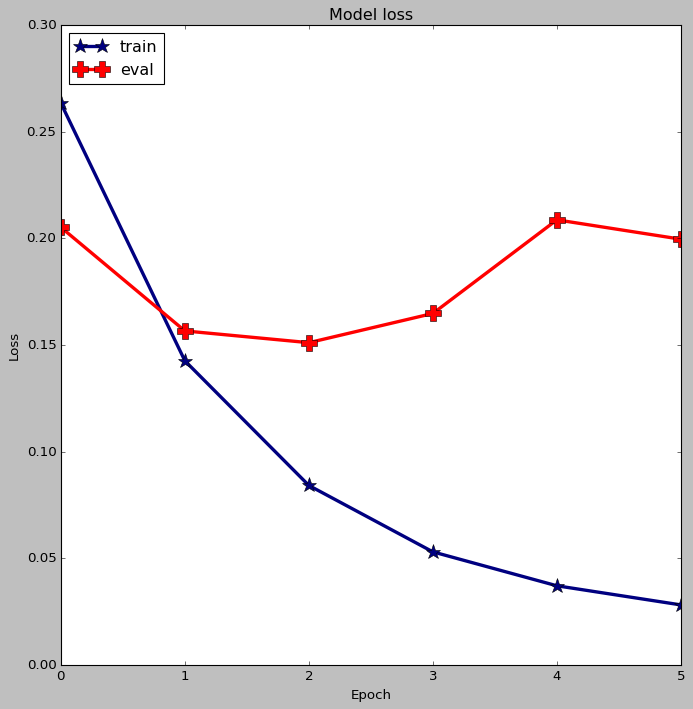

time: 255 ms (started: 2024-01-09 06:30:33 +00:00)


In [44]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],color="navy",marker="*",lw=3,markersize=14)
plt.plot(history.history['val_loss'],color="red",marker="P",lw=3,markersize=14)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

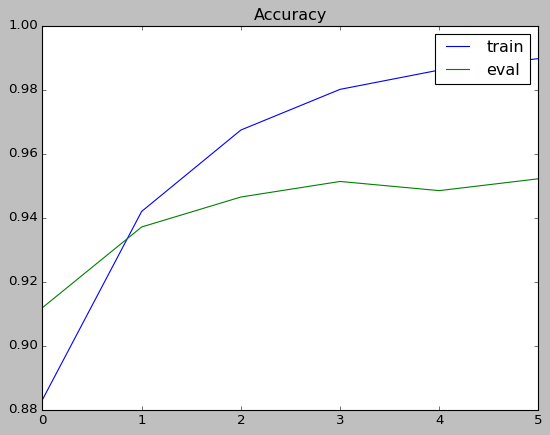

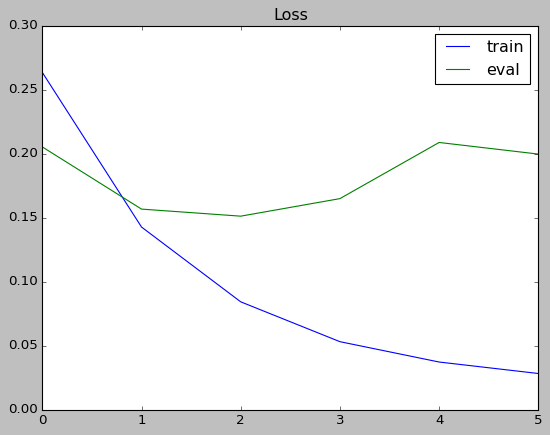

time: 448 ms (started: 2024-01-09 06:30:39 +00:00)


In [45]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='eval')
plt.legend()
plt.show();


plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='eval')
plt.legend()
plt.show();

In [46]:
pred= model.predict([test_ids,test_attention_masks],batch_size=10)
final_pred = np.argmax(pred,axis=1)

3041/3041 [==============================] - 183s 59ms/step
time: 3min 4s (started: 2024-01-09 06:30:46 +00:00)


In [47]:
accuracy_score(test_labels,final_pred)

0.9534990791896869

time: 6.2 ms (started: 2024-01-09 06:33:57 +00:00)


In [48]:
print('Classification Report\n')
print(classification_report(test_labels,final_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     15204
           1       0.96      0.95      0.95     15204

    accuracy                           0.95     30408
   macro avg       0.95      0.95      0.95     30408
weighted avg       0.95      0.95      0.95     30408

time: 55.1 ms (started: 2024-01-09 06:34:04 +00:00)


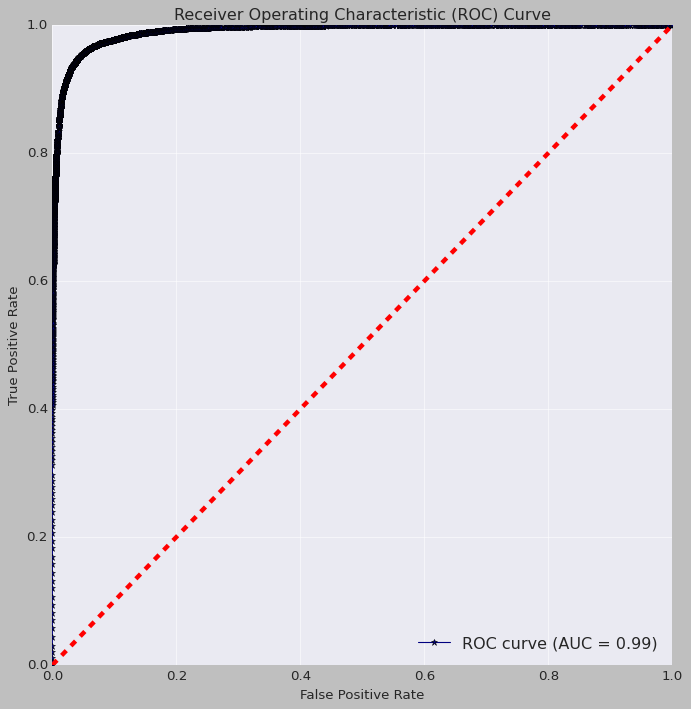

time: 267 ms (started: 2024-01-09 06:34:10 +00:00)


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
predicted_probabilities = pred[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, predicted_probabilities)
auc_score = roc_auc_score(test_labels, predicted_probabilities)
plt.figure(figsize=(10,10))
plt.style.use("seaborn-darkgrid")
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score,color="navy",marker="*")
plt.plot([0, 1], [0, 1],lw=4,color="red",linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

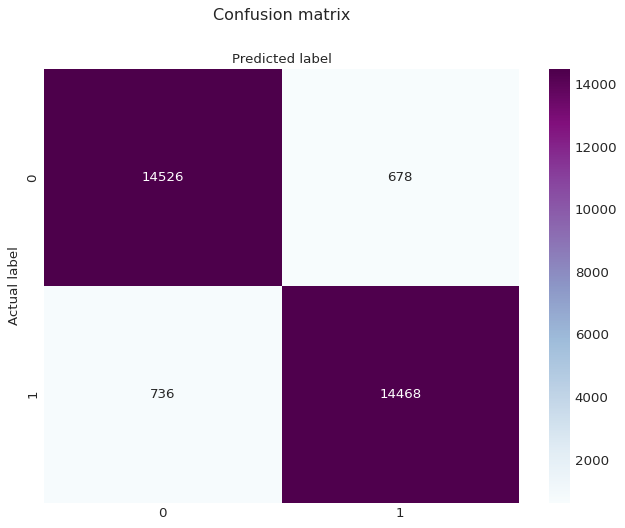

time: 383 ms (started: 2024-01-09 06:34:17 +00:00)


In [50]:
def plot_conf_matrix(test_label,predicted_label):
    cm = confusion_matrix(test_label,predicted_label)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');

plot_conf_matrix(test_labels,final_pred)